In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Preparation

In [133]:
df = pd.read_csv('big_startup_secsees_dataset.csv')
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [134]:
df.sample(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
5123,/organization/automatic-agency,Automatic Agency,http://www.automaticpartners.com,Advertising|Development Platforms|E-Commerce|P...,-,closed,USA,CA,Anaheim,Irvine,1,2008-06-09,2011-06-01,2011-06-01
31282,/organization/kurani-interactive,Kurani Interactive,http://www.kurani.com,iPhone|Mobile|Software|Technology,275000,closed,USA,NJ,Newark,Red Bank,1,2000-01-01,2010-11-25,2010-11-25
18429,/organization/entratympanic,EntraTympanic,http://entratympanic.com,Hardware + Software,25000,operating,USA,MA,Boston,Medfield,1,2009-01-01,2013-08-21,2013-08-21
31376,/organization/l7-defense,L7 Defense,http://www.l7defense.com,Cyber|Cyber Security|IT and Cybersecurity,750000,operating,ISR,1,ISR - Other,Beersheba,1,2015-01-01,2015-07-10,2015-07-10
54620,/organization/steak-hoagie-shop,Steak & Hoagie Shop,NaN,Hospitality,-,operating,USA,PA,Philadelphia,Philadelphia,1,1996-01-01,2013-08-19,2013-08-19


In [135]:
# drop unnecessary columns
df.drop(['permalink', 'name', 'homepage_url'], axis=1, inplace=True)

## Data Type

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category_list      63220 non-null  object
 1   funding_total_usd  66368 non-null  object
 2   status             66368 non-null  object
 3   country_code       59410 non-null  object
 4   state_code         57821 non-null  object
 5   region             58338 non-null  object
 6   city               58340 non-null  object
 7   funding_rounds     66368 non-null  int64 
 8   founded_at         51147 non-null  object
 9   first_funding_at   66344 non-null  object
 10  last_funding_at    66368 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.6+ MB


In [137]:
df.funding_total_usd = df.funding_total_usd.replace('-', -1) # flag missing value as special case
df.funding_total_usd = pd.to_numeric(df.funding_total_usd, errors='coerce') # convert into numeric
df.funding_total_usd = df.funding_total_usd / 1000000 # convert into million unit

In [138]:
# convert date columns to datetime
df.first_funding_at = pd.to_datetime(df.first_funding_at, errors='coerce')
df.last_funding_at = pd.to_datetime(df.last_funding_at, errors='coerce')

## Missing values

In [139]:
df.isnull().sum()

category_list         3148
funding_total_usd        0
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15221
first_funding_at        27
last_funding_at          0
dtype: int64

In [140]:
df.category_list = df.category_list.fillna('Unknown')

In [141]:
# drop column for having too many null values
df.drop(['founded_at'], axis=1, inplace=True)

In [142]:
print(df.status.value_counts(), '\n')

print('Removing missing values...', '\n')
# drop rows with missing values in first_funding_at column
df = df.dropna(subset='first_funding_at')
# drop rows with missing values in all 4 columns
df = df.dropna(subset=['country_code', 'city'], how='any')

print(df.status.value_counts(), '\n')

status
operating    53034
closed        6238
acquired      5549
ipo           1547
Name: count, dtype: int64 

Removing missing values... 

status
operating    47135
acquired      5203
closed        4486
ipo           1491
Name: count, dtype: int64 



In [143]:
df.isnull().sum()  

category_list          0
funding_total_usd      0
status                 0
country_code           0
state_code           814
region                 2
city                   0
funding_rounds         0
first_funding_at       0
last_funding_at        0
dtype: int64

In [144]:
df.state_code = df.state_code.fillna('Unknown')
df.region = df.region.fillna('Unknown')

# EDA

<Axes: xlabel='status'>

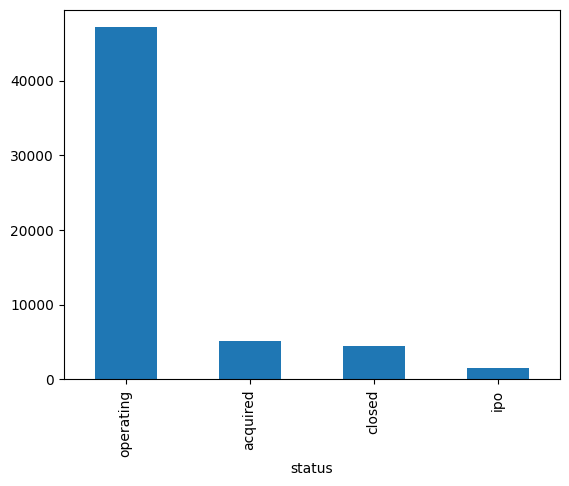

In [145]:
df.status.value_counts().plot(kind='bar')

`status` will be the target to predict. It has class imbalance so we have to beware of the model being biased.

count    58315.000000
mean         1.796073
std          1.413394
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: funding_rounds, dtype: float64


<Axes: xlabel='funding_rounds', ylabel='count'>

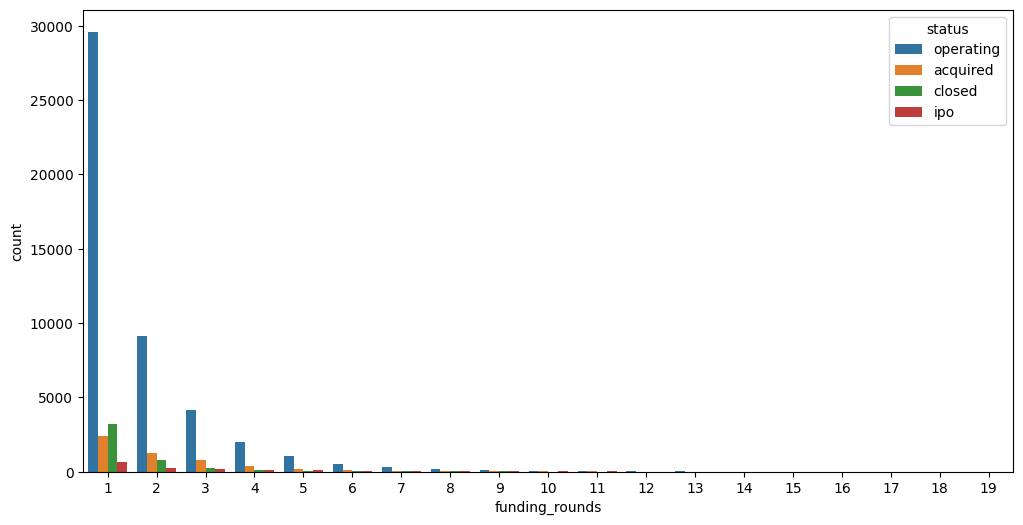

In [146]:
print(df.funding_rounds.describe())
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='funding_rounds', hue='status')

Findings:
- Average funding round is around 1.73
- Most startups have fewer than 2 funding rounds with a maximum of 19

count    58315.000000
mean        15.660100
std        171.457954
min         -0.000001
25%          0.060000
50%          1.100064
75%          7.700000
max      30079.503000
Name: funding_total_usd, dtype: float64


<Axes: xlabel='funding_rounds', ylabel='funding_total_usd'>

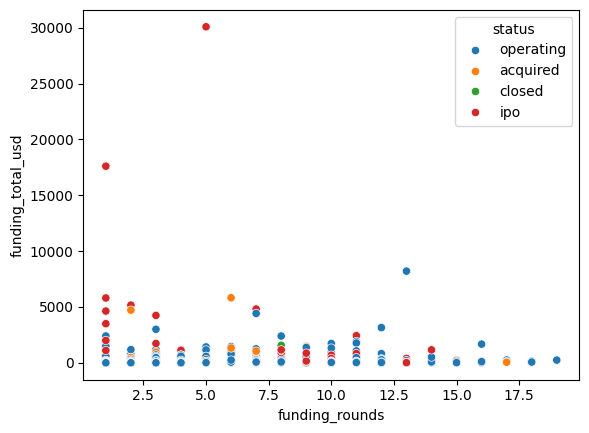

In [147]:
print(df.funding_total_usd.describe())
sns.scatterplot(data=df, x='funding_rounds', y='funding_total_usd', hue='status')

Findings:
- Average funding total is around 20 million USD
- Most startups have funding total below 10 million USD with a maximum of 30079 million USD
- There are extreme outliers with a high standard deviation

status
operating    47135
acquired      5203
closed        4486
ipo           1491
Name: count, dtype: int64 

Removing outliers... 

status
operating    47131
acquired      5201
closed        4486
ipo           1483
Name: count, dtype: int64 

count    58301.000000
mean        13.860532
std         59.419925
min         -0.000001
25%          0.060000
50%          1.100000
75%          7.669424
max       2425.700000
Name: funding_total_usd, dtype: float64


<Axes: xlabel='funding_rounds', ylabel='funding_total_usd'>

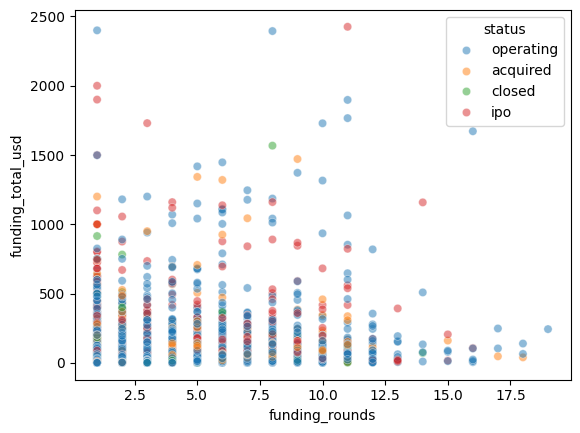

In [148]:
print(df.status.value_counts(), '\n')

print('Removing outliers...', '\n')
df_clean = df[df.funding_total_usd < 3000]

print(df_clean.status.value_counts(), '\n')

print(df_clean.funding_total_usd.describe())
sns.scatterplot(data=df_clean, x='funding_rounds', y='funding_total_usd', hue='status', alpha=0.5)

# Model

## Feature engineering

In [78]:
# remove outliers
df_feature = df[df.funding_total_usd < 3000].copy()

# add is_undisclosed column
df_feature['is_undisclosed'] = (df_feature.funding_total_usd == -1).astype(int)

In [79]:
# convert date columns to duration
df_feature['funding_duration'] = (df_feature.last_funding_at - df_feature.first_funding_at).dt.days

# drop first_funding_at and last_funding_at columns
df_feature.drop(['first_funding_at', 'last_funding_at'], axis=1, inplace=True)

In [80]:
# split categories into lists
df_feature['category_list_split'] = df_feature['category_list'].str.split('|')

# drop category_list column
df_feature.drop(['category_list'], axis=1, inplace=True)

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_feature.status = le.fit_transform(df_feature.status)

In [82]:
list(df_feature.columns)

['funding_total_usd',
 'status',
 'country_code',
 'state_code',
 'region',
 'city',
 'funding_rounds',
 'is_undisclosed',
 'funding_duration',
 'category_list_split']

In [83]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer


class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()
        
    def fit(self, X, y=None):
        self.mlb.fit(X.iloc[:, 0].tolist())
        return self
    
    def transform(self, X):
        return self.mlb.transform(X.iloc[:, 0].tolist())
    
    def get_feature_names_out(self, input_features=None):
        return self.mlb.classes_


In [84]:
# normalize data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder

column_transformer = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), ['funding_total_usd', 'funding_rounds', 'funding_duration']), # Scale numeric columns with RobustScaler to handle outliers
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['country_code', 'state_code', 'region', 'city']), # One-hot encode categorical columns
        ('categories', MultiLabelBinarizerTransformer(), ['category_list_split']), # Multi-label binarize categorical columns
    ],
    remainder='passthrough' # Don't scale other columns
)

## Training

In [85]:
# split into train and test sets
from sklearn.model_selection import train_test_split

X = df_feature.drop('status', axis=1)
y = df_feature.status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(46640, 9) (11661, 9) (46640,) (11661,)


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', model)
], verbose=True)

pipeline.fit(X_train, y_train)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.2s


c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', RobustScaler(),
                                                  ['funding_total_usd',
                                                   'funding_rounds',
                                                   'funding_duration']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country_code', 'state_code',
                                                   'region', 'city']),
                                                 ('categories',
                                                  MultiLabelBinarizerTransformer(),
                                                  ['category_list_split'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3,
                                        random_state=42))],
         verbose=True)

In [87]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

    acquired       0.14      0.60      0.23      1046
      closed       0.09      0.41      0.15       904
         ipo       0.11      0.42      0.18       294
   operating       0.87      0.19      0.31      9417

    accuracy                           0.25     11661
   macro avg       0.30      0.41      0.22     11661
weighted avg       0.73      0.25      0.29     11661



c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Group Email', 'HDTV', 'Startup Histrionics'] will be ignored
  warnings.warn(


In [88]:
from sklearn.tree import export_text

print(export_text(model, feature_names=column_transformer.get_feature_names_out()))

|--- num__funding_total_usd <= 0.64
|   |--- num__funding_total_usd <= 0.04
|   |   |--- num__funding_total_usd <= -0.15
|   |   |   |--- class: 3
|   |   |--- num__funding_total_usd >  -0.15
|   |   |   |--- class: 1
|   |--- num__funding_total_usd >  0.04
|   |   |--- categories__Biotechnology <= 0.50
|   |   |   |--- class: 0
|   |   |--- categories__Biotechnology >  0.50
|   |   |   |--- class: 2
|--- num__funding_total_usd >  0.64
|   |--- num__funding_total_usd <= 7.18
|   |   |--- categories__Biotechnology <= 0.50
|   |   |   |--- class: 0
|   |   |--- categories__Biotechnology >  0.50
|   |   |   |--- class: 2
|   |--- num__funding_total_usd >  7.18
|   |   |--- categories__Biotechnology <= 0.50
|   |   |   |--- class: 2
|   |   |--- categories__Biotechnology >  0.50
|   |   |   |--- class: 2



In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', model)
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation scores: {cv_scores.std()}")

c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Anything Capital Intensive', 'EDA Tools', 'Labor Optimization', 'Startup Histrionics'] will be ignored
  warnings.warn(
c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Biotechnology and Semiconductor', 'East Africa', 'Funeral Industry', 'Hip Hop', 'Motion Capture', 'West Africa'] will be ignored
  warnings.warn(
c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Group Email', 'HDTV', 'Made in Italy', 'Private Corrections', 'Vulnerability Management'] will be ignored
  warnings.warn(
c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Elderly', 'First Ai

Cross-validation scores: [0.81030786 0.80849057 0.80797599 0.80917667 0.80866209]
Mean cross-validation score: 0.808922636228751
Standard deviation of cross-validation scores: 0.0007917201015386759


c:\Users\E\.virtualenvs\startup-success-prediction-18lPohuG\lib\site-packages\sklearn\preprocessing\_label.py:900: UserWarning: unknown class(es) ['Gay & Lesbian', 'South East Asia', 'TV Station', 'Timeshares'] will be ignored
  warnings.warn(


In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

Best Parameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 50}
Best Cross-Validation Score: 0.8097288200115234
